## Practice from https://www.kaggle.com/amelinvladislav/map-of-temperatures-and-analysis-of-global-warming

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import seaborn as sns
import time
import warnings
warnings.filterwarnings('ignore')

In [2]:
warming = pd.read_csv('GlobalLandTemperaturesByCountry.csv')

In [3]:
warming 

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland
...,...,...,...,...
577457,2013-05-01,19.059,1.022,Zimbabwe
577458,2013-06-01,17.613,0.473,Zimbabwe
577459,2013-07-01,17.000,0.453,Zimbabwe
577460,2013-08-01,19.759,0.717,Zimbabwe


****insghts:
1)we noticed that there are duplicate entry of the same country nad some with null values -> remove the entry with empty temperature information
2)

In [4]:
warming.Country.unique()

array(['Åland', 'Afghanistan', 'Africa', 'Albania', 'Algeria',
       'American Samoa', 'Andorra', 'Angola', 'Anguilla', 'Antarctica',
       'Antigua And Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Asia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Baker Island', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium',
       'Belize', 'Benin', 'Bhutan', 'Bolivia',
       'Bonaire, Saint Eustatius And Saba', 'Bosnia And Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands', 'Bulgaria',
       'Burkina Faso', 'Burma', 'Burundi', "Côte D'Ivoire", 'Cambodia',
       'Cameroon', 'Canada', 'Cape Verde', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'China',
       'Christmas Island', 'Colombia', 'Comoros',
       'Congo (Democratic Republic Of The)', 'Congo', 'Costa Rica',
       'Croatia', 'Cuba', 'Curaçao', 'Cyprus', 'Czech Republic',
       'Denmark (Europe)', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecu

In [5]:
warming_clear = warming[~warming['Country'].isin(['Denmark', 'Antarctica', 'France', 'Europe', 'Netherlands',
     'United Kingdom', 'Africa', 'South America'])]

In [6]:
warming[warming.Country == 'Africa']

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
5345,1850-01-01,19.764,1.185,Africa
5346,1850-02-01,22.393,1.188,Africa
5347,1850-03-01,23.672,1.954,Africa
5348,1850-04-01,24.197,1.364,Africa
5349,1850-05-01,24.302,0.938,Africa
...,...,...,...,...
7305,2013-05-01,26.671,0.301,Africa
7306,2013-06-01,26.324,0.188,Africa
7307,2013-07-01,25.856,0.238,Africa
7308,2013-08-01,25.911,0.331,Africa


In [7]:
warming_clear = warming_clear.replace(
   ['Denmark (Europe)', 'France (Europe)', 'Netherlands (Europe)', 'United Kingdom (Europe)'],
   ['Denmark', 'France', 'Netherlands', 'United Kingdom'])

In [24]:
countries = warming_clear['Country'].unique()
avg_temp = []
for c in countries:
    avg_temp.append(warming_clear[warming_clear['Country']==c]['AverageTemperature'].mean())

In [59]:
data = [dict(
        type = 'choropleth',
        locations = countries,
        z = avg_temp,
        locationmode = 'country names',
        #text = countries,
        marker = dict(
                    line = dict(color = 'rgb(0,0,0)',width = 1)),
        colorbar = dict(autotick = True, tickprefic = '',),
        title = '# Average\nTemperatur,\n°C'
    )
]
layout = dict(
            title = 'Average land temperature in countries',
            geo = dict(
                showframe = False,
                showocean = True,
                oceancolor = 'rgb(0,200,255)',
                projection = dict(
                    type = 'orthographic',
                    rotation = dict(
                        lon = 60,
                        lat = 10),
                    ),
                    lonaxis = dict(
                        showgrid = True,
                        gridcolor = 'rgb(102,102,102)'
                    ),
                    lataxis = dict(
                        showgrid = True,
                        gridcolor = 'rgb(102,102,102)'
                    )
                
            )
    )

fig = dict (data = data, layout = layout)
py.iplot(fig,validate = False, filename = 'worldmap')

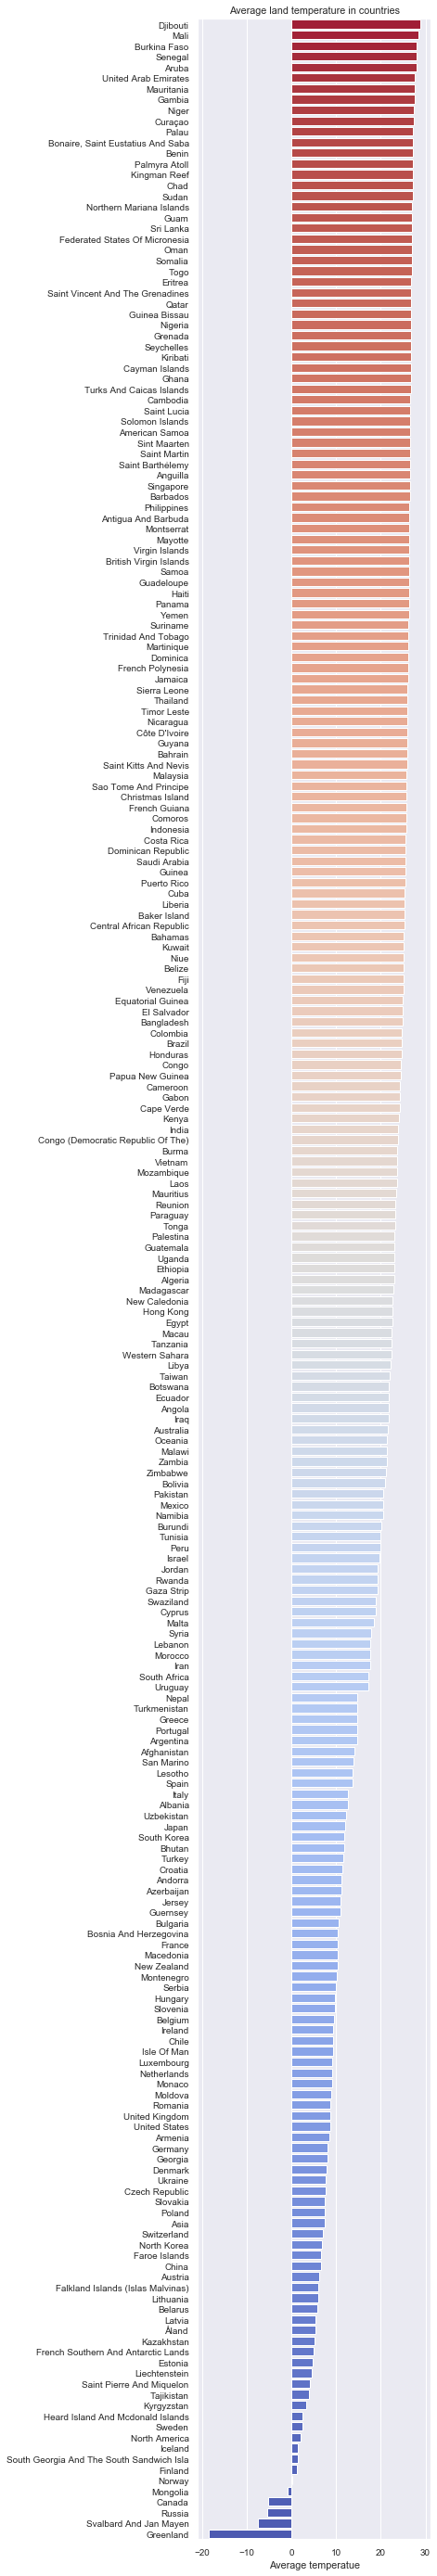

In [101]:
avg_bar_reverse,country_bar_reverse = (list(x) for x in zip(*sorted(zip(avg_temp, countries), reverse = True)))
sns.set(font_scale = 0.9)
f,ax = plt.subplots(figsize=(4.5,50))
colors_cw = sns.color_palette('coolwarm',len(countries))
sns.barplot(avg_bar_reverse,country_bar_reverse,palette = colors_cw[::-1]) #reverse the list
Text = ax.set(xlabel = 'Average temperatue', title = 'Average land temperature in countries')


In [102]:
#is there a global warming?
#this dataset has data descriping the Earth's temperature
global_temp = pd.read_csv("GlobalTemperatures.csv")

In [104]:
global_temp

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
3187,2015-08-01,14.755,0.072,20.699,0.110,9.005,0.170,17.589,0.057
3188,2015-09-01,12.999,0.079,18.845,0.088,7.199,0.229,17.049,0.058
3189,2015-10-01,10.801,0.102,16.450,0.059,5.232,0.115,16.290,0.062
3190,2015-11-01,7.433,0.119,12.892,0.093,2.157,0.106,15.252,0.063


In [121]:
import datetime
global_temp['years'] = global_temp['dt'].apply(lambda x:datetime.datetime.strptime(x, '%Y-%m-%d').year)


In [126]:
temp_mean_year = global_temp.groupby('years').mean()

In [136]:
a = np.array(temp_mean_year['LandAverageTemperature'])
b = np.array(temp_mean_year['LandAverageTemperatureUncertainty'])

In [152]:
trace0 = go.Scatter(
    x = temp_mean_year.index,
    y = a+b,
    fill = None,
    mode = 'lines',
    name = 'Unvertainty top',
    line = dict(
        color = 'rgb(0,255,255)',
    )
)

trace1 = go.Scatter(
    x = temp_mean_year.index,
    y = a-b,
    fill = 'tonexty',
    mode = 'lines',
    name = 'Unvertainty bot',
    line = dict(
        color = 'rgb(0,255,255)',
    )
)

trace2 = go.Scatter(
    x = temp_mean_year.index,
    y = a,
    name = 'Average Temperature',
    line = dict(
        color = 'rgb(199,121,093)',
    )
)

data = [trace0,trace1,trace2]

layout = go.Layout(
        xaxis = dict(title='year'),
    yaxis = dict(title='Average Temperature, °C'),
    title = 'Average land temperature in world',
    showlegend = False
)

fig = go.Figure(data=data,layout = layout)
py.iplot(fig)

In [198]:
#take a look the temperature change in each continent
continent = ['Russia','United States','Niger','Greenland','Australia','Bolivia']

In [161]:
warming_clear['year'] = warming_clear['dt'].apply(lambda x:datetime.datetime.strptime(x, '%Y-%m-%d').year)

ValueError: No axis named dt for object type <class 'pandas.core.frame.DataFrame'>

In [168]:
avg_temp_continent = warming_clear.groupby(['Country','year']).mean()
avg_temp_continent

AverageTemperature  AverageTemperatureUncertainty
Country     year                                                   
Afghanistan 1838           18.379571                       2.756000
            1839                 NaN                            NaN
            1840           13.413455                       2.502000
            1841           13.997600                       2.452100
            1842           15.154667                       2.381222
...                              ...                            ...
Åland       2009            6.489083                       0.366917
            2010            4.861917                       0.397833
            2011            7.170750                       0.419167
            2012            6.063917                       0.372417
            2013            6.229750                       0.536250

[46577 rows x 2 columns]

In [205]:
traces = []
colors = ['rgb(0, 255, 255)', 'rgb(255, 0, 255)', 'rgb(0, 0, 0)',
          'rgb(255, 0, 0)', 'rgb(0, 255, 0)', 'rgb(0, 0, 255)']

for i in range(len(continent)):
    traces.append(go.Scatter(
        x = avg_temp_continent[avg_temp_continent.index.get_level_values(0)==continent[1]].index.get_level_values(1),
        y = avg_temp_continent[avg_temp_continent.index.get_level_values(0) ==continent[i]],
        mode = 'lines',
        name = continent[i],
        line = dict(color=colors[i])
    ))
layout = go.Layout(
    xaxis = dict(title='year'),
    yaxis = dict(title='Average Temperature, °C'),
    title = 'Average land temperature on the continents',
)

fig = go.Figure(data=traces,layout=layout)
py.iplot(fig)

In [ ]:
indexs = pd.MultiIndex.from_arrays(avg_temp_continent.index)

In [203]:
avg_temp_continent[avg_temp_continent.index.get_level_values(0)==continent[1]].index.get_level_values(1)

Int64Index([1768, 1769, 1770, 1771, 1772, 1773, 1774, 1775, 1776, 1777,
            ...
            2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013],
           dtype='int64', name='year', length=246)